# Topics 
- How to create a Sine Wave
- How to create a Gaussian Noise
- Create Noisy Sine Wave by adding Gaussian Noise in it
- Sample 10 points from a noisy Sine wave and fit a curve that can be characterized by polynomial functions
- Use polynomial curve fitting with different orders of polynomial to see underfitting (M=0) and overfitting (M=9) problem



# How to create a Sine wave

In [1]:
import numpy as np

n_points = 100 # Number of points
x = np.linspace(0, 1, num=n_points)# Sample n_points
z = np.sin(2*np.pi*x)# Create sine wave of sampled n_points

In [2]:
z

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

### Plot the sine wave using the sampled points

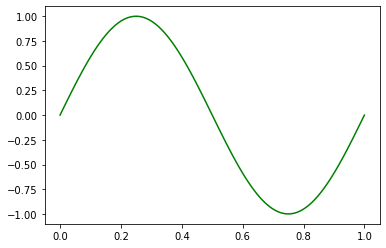

In [3]:
# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x, z, 'g-')

# How to create a Gaussian noise

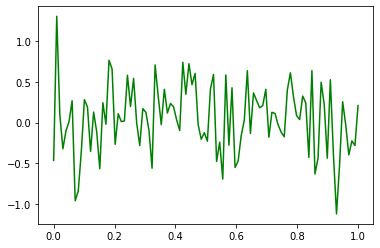

In [4]:
eta = .4*np.random.normal(0,1,n_points) #Add Gaussian noise of mean 0 and standard deviation 1

# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x, eta, 'g-')

# Noisy sine wave

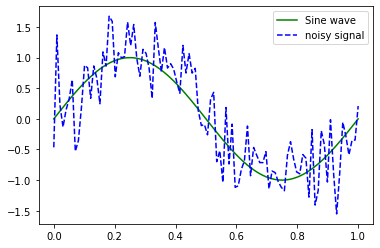

In [5]:
t = z+eta

# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x, z, 'g-',x,t,'b--') #z is the original sine signal and t is the noisy signal
plt.legend(('Sine wave', 'noisy signal'))


# Sample 10 points randomly from a noisy sine wave

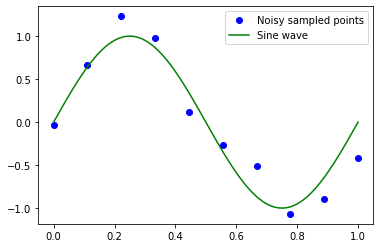

In [6]:
# 10 points from the noisy sin(2*pi*x)
import numpy as np

sample_points = 10

x_sampled = np.linspace(0, 1, num=sample_points)
t_sampled = np.sin(2*np.pi*x_sampled)+0.2*np.random.normal(0,1,sample_points) #Add noise of mean 0 and standard deviation 1 

# Plot
import matplotlib.pyplot as plt
plt.figure
plt.plot(x_sampled, t_sampled, 'bo',x, z, 'g-')
plt.legend(('Noisy sampled points', 'Sine wave'))


# Polynomial curve fitting 

Coefficients are [ 19.39506891 -30.35210838  10.62705265  -0.04011738]


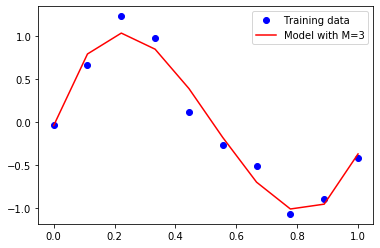

In [7]:
# Input x_sampled and t_sampled (N=10 sampled points)
np.random.seed(1)
M = 3 #order
coeff = np.polyfit(x_sampled, t_sampled, M) # Fitting the polynomial and finding coefficients
print('Coefficients are', coeff)
p = np.poly1d(coeff)# Polynomial construction
y_pred = p(x_sampled)

plt.figure
plt.plot(x_sampled, t_sampled, 'bo', x_sampled, y_pred, 'r-')
plt.legend(('Training data', 'Model with M=3'))


In [8]:
# Compute Mean square error (MSE)
err = 0.5*(np.sum((y_pred-t_sampled)**2))
print (err) #Training error


0.10064079265536174


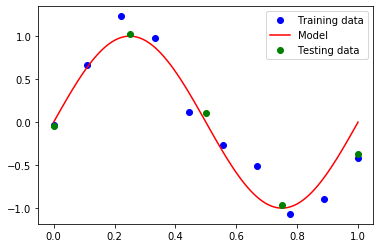

In [9]:
#Check the output of new data points
n = 5
x_new = np.linspace(0, 1, num=n)
eta = 0.2*np.random.normal(0,1,n) #Add noise of mean 0 and standard deviation 1
y_new = np.sin(2*np.pi*x_new)+eta 

y_new_pred = p(x_new)


plt.figure
plt.plot(x_sampled, t_sampled, 'bo',x, z, 'r-',x_new, y_new_pred, 'go')
plt.legend(('Training data', 'Model', 'Testing data'))


In [10]:

err = 0.5*(np.sum((y_new_pred-y_new)**2))
print (err)#Testing error

0.28010739708394106


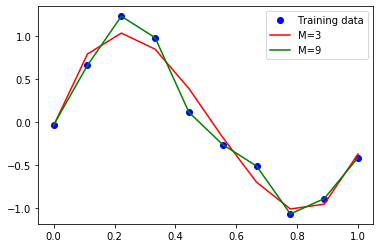

In [11]:
#Polynomial curve fitting 

z3 = np.polyfit(x_sampled, t_sampled, 3) # Fitting the polynomial and finding coefficients
p3 = np.poly1d(z3)# 3rd order polynomial construction
y3 = p3(x_sampled)

z9 = np.polyfit(x_sampled, t_sampled, 9) # Fitting the polynomial and finding coefficients
p9 = np.poly1d(z9)# 9th order polynomial construction
y9 = p9(x_sampled)

plt.figure
plt.plot(x_sampled, t_sampled, 'bo', x_sampled,y3,'r-',x_sampled,y9,'g-')
plt.legend(('Training data', 'M=3','M=9'))

# Use polynomial curve fitting with different orders of polynomial to see underfitting (M=0) and overfitting (M=9) problem

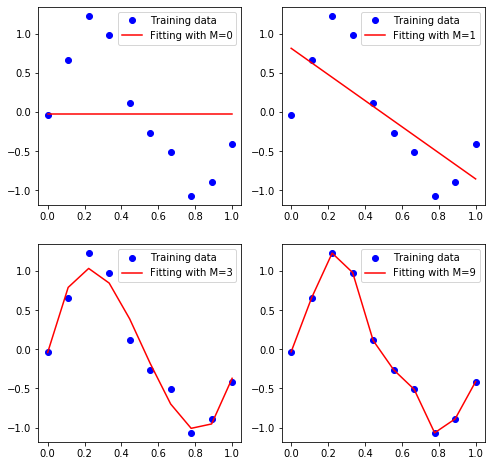

In [12]:
plt.figure(figsize=(8,8))
for j,i in enumerate([0,1,3,9]):
    z = np.polyfit(x_sampled, t_sampled, i) # Fitting the polynomial and finding coefficients
    p = np.poly1d(z)# 3rd order polynomial construction
    y = p(x_sampled)
#     plt.figure
    plt.subplot(2, 2,j+1)
    plt.plot(x_sampled, t_sampled, 'bo', x_sampled,y,'r-')
    plt.legend(('Training data', 'Fitting with M='+str(i)))
